In [ ]:
df = pd.read_csv("/content/banking_loan_applications.csv")


In [ ]:
# Convert dates
df['Application_Date'] = pd.to_datetime(df['Application_Date'], errors='coerce')

# Check data types
print(df.dtypes)

# Categorical columns
categorical_cols = ['Gender', 'Marital_Status', 'Education', 'Employment_Type', 'Loan_Purpose', 'Loan_Status']
# Continuous columns
continuous_cols = ['Age', 'Annual_Income', 'Loan_Amount', 'Credit_Score', 'Loan_Term_Months']

print("\nCategorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


Application_ID              object
Gender                      object
Age                          int64
Marital_Status              object
Education                   object
Employment_Type             object
Annual_Income                int64
Loan_Amount                  int64
Loan_Purpose                object
Credit_Score               float64
Loan_Term_Months             int64
Loan_Status                 object
Application_Date    datetime64[ns]
dtype: object

Categorical Columns: ['Gender', 'Marital_Status', 'Education', 'Employment_Type', 'Loan_Purpose', 'Loan_Status']
Continuous Columns: ['Age', 'Annual_Income', 'Loan_Amount', 'Credit_Score', 'Loan_Term_Months']


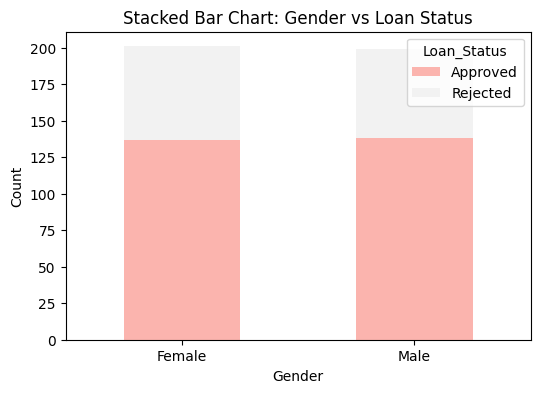

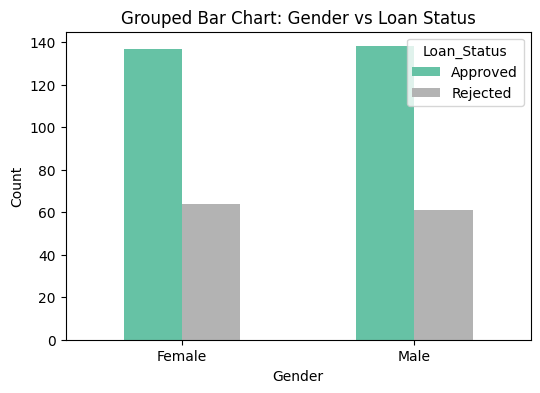

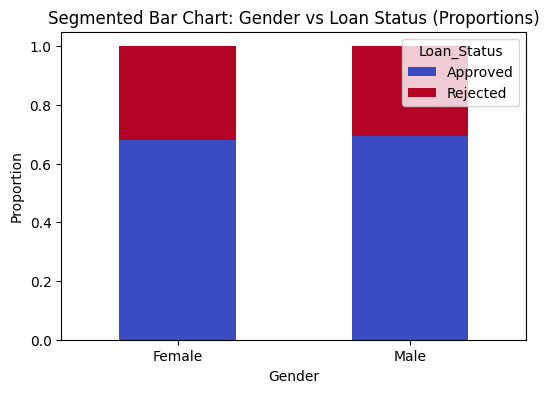

<Figure size 800x600 with 0 Axes>

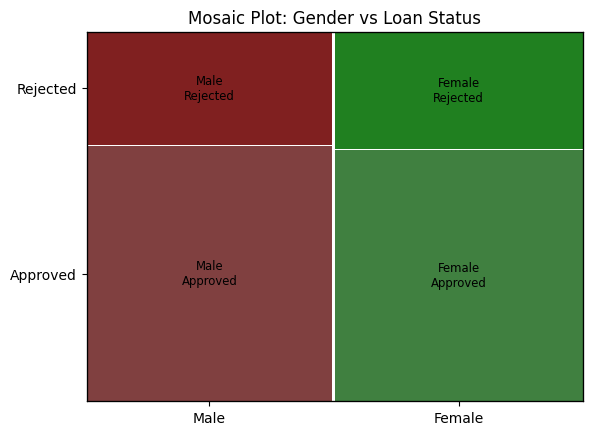

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Crosstab of Gender vs Loan_Status
ct = pd.crosstab(df['Gender'], df['Loan_Status'])

# ✅ 1. Stacked Bar Chart
ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Pastel1')
plt.title("Stacked Bar Chart: Gender vs Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# ✅ 2. Grouped Bar Chart
ct.plot(kind='bar', stacked=False, figsize=(6,4), colormap='Set2')
plt.title("Grouped Bar Chart: Gender vs Loan Status")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# ✅ 3. Segmented Bar Chart (Proportions)
seg_ct = ct.div(ct.sum(axis=1), axis=0)
seg_ct.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
plt.title("Segmented Bar Chart: Gender vs Loan Status (Proportions)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

# ✅ 4. Mosaic Plot
plt.figure(figsize=(8,6))
mosaic(df, ['Gender', 'Loan_Status'])
plt.title("Mosaic Plot: Gender vs Loan Status")
plt.show()


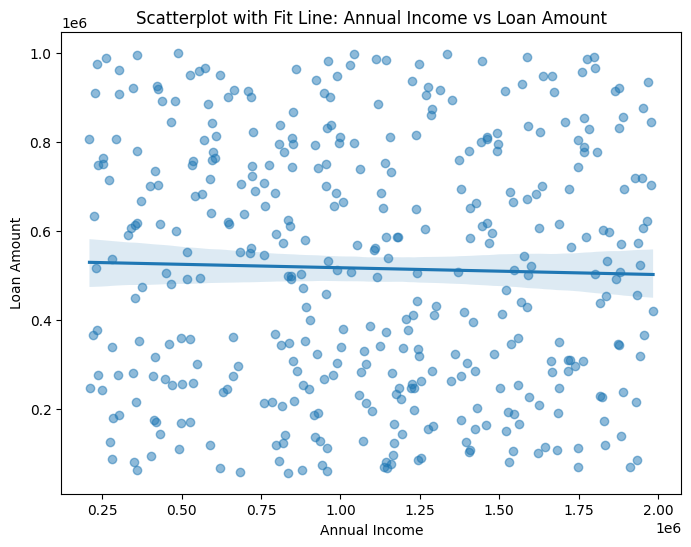

In [ ]:
# Scatterplot with fit line
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Annual_Income', y='Loan_Amount', scatter_kws={'alpha':0.5})
plt.title("Scatterplot with Fit Line: Annual Income vs Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()


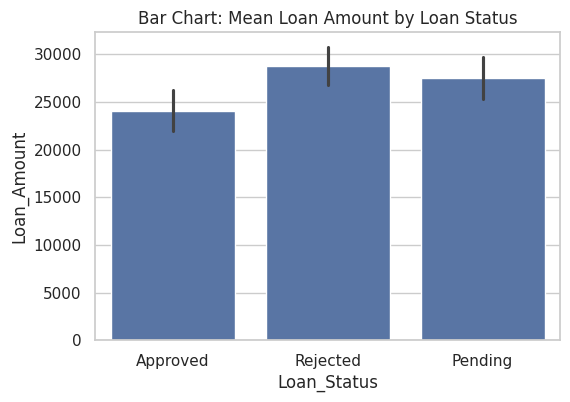

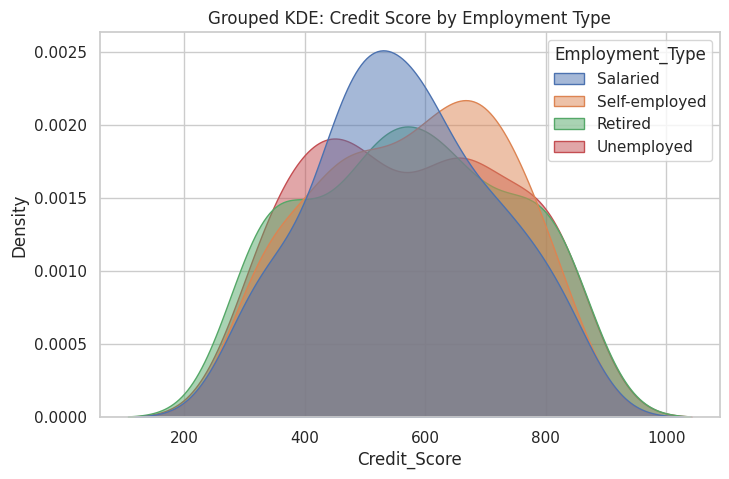

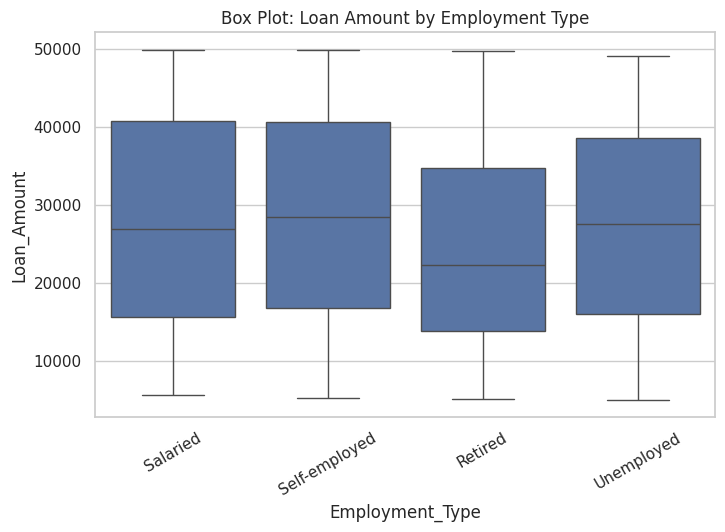

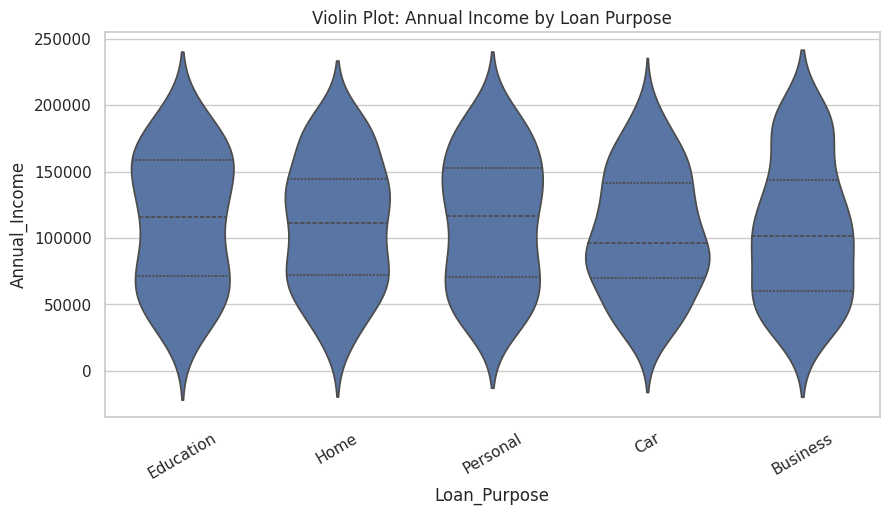

<Figure size 800x600 with 0 Axes>

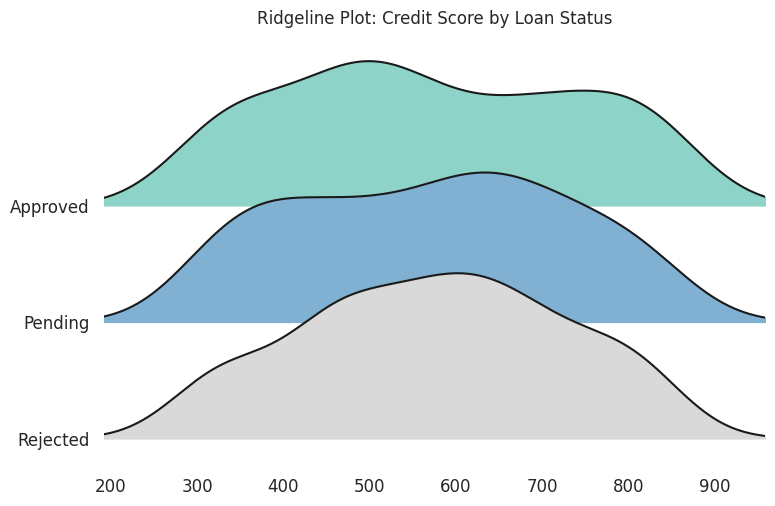

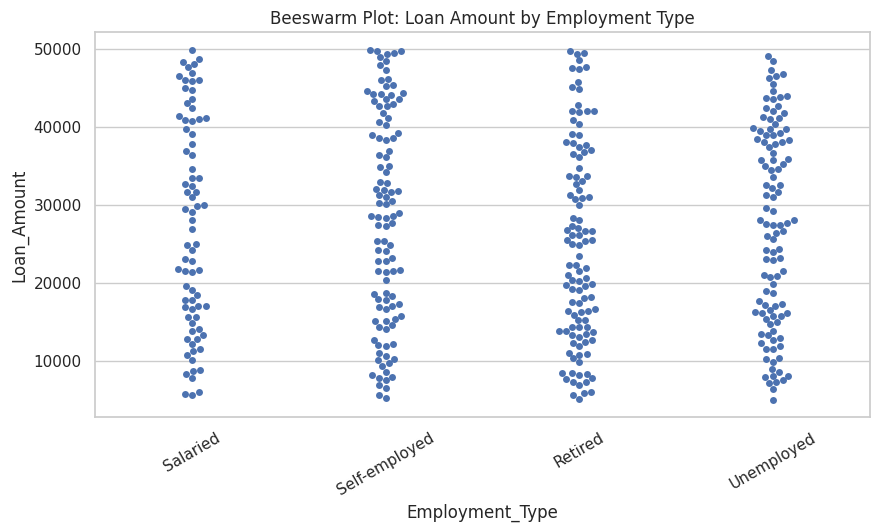

In [ ]:
!pip install joypy
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

# 1. Bar Chart - Mean Loan Amount by Loan Status
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Loan_Status', y='Loan_Amount', estimator='mean')
plt.title("Bar Chart: Mean Loan Amount by Loan Status")
plt.show()

# 2. Grouped Kernel Density Plot - Credit Score by Employment Type
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Credit_Score', hue='Employment_Type', fill=True, common_norm=False, alpha=0.5)
plt.title("Grouped KDE: Credit Score by Employment Type")
plt.show()

# 3. Box Plot - Loan Amount by Employment Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Employment_Type', y='Loan_Amount')
plt.title("Box Plot: Loan Amount by Employment Type")
plt.xticks(rotation=30)
plt.show()

# 4. Violin Plot - Annual Income by Loan Purpose
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Loan_Purpose', y='Annual_Income', inner='quartile')
plt.title("Violin Plot: Annual Income by Loan Purpose")
plt.xticks(rotation=30)
plt.show()

# 5. Ridgeline Plot - Credit Score by Loan Status
plt.figure(figsize=(8,6))
joypy.joyplot(df, by='Loan_Status', column='Credit_Score', figsize=(8,5), colormap=plt.cm.Set3)
plt.title("Ridgeline Plot: Credit Score by Loan Status")
plt.show()

# 6. Beeswarm Plot - Loan Amount by Employment Type
plt.figure(figsize=(10,5))
sns.swarmplot(data=df, x='Employment_Type', y='Loan_Amount')
plt.title("Beeswarm Plot: Loan Amount by Employment Type")
plt.xticks(rotation=30)
plt.show()

